<a href="https://colab.research.google.com/github/Statistically-Inclined/Statistically-Inclined/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
numerical_features = df.select_dtypes(include = ['int', 'float']).columns.to_list()
categorical_features = df.select_dtypes(exclude = ['int', 'float']).columns.to_list()

In [8]:
print('Numerical features: ',numerical_features)
print('Categorical Features: ',categorical_features)

Numerical features:  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Categorical Features:  ['Geography', 'Gender']


In [9]:
continuous_features = [feature for feature in numerical_features if df[feature].nunique()>25]
discrete_features = [feature for feature in numerical_features if df[feature].nunique()<25]

In [10]:
print('Continuous Features: ',continuous_features)
print('Discrete Features: ',discrete_features)

Continuous Features:  ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
Discrete Features:  ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


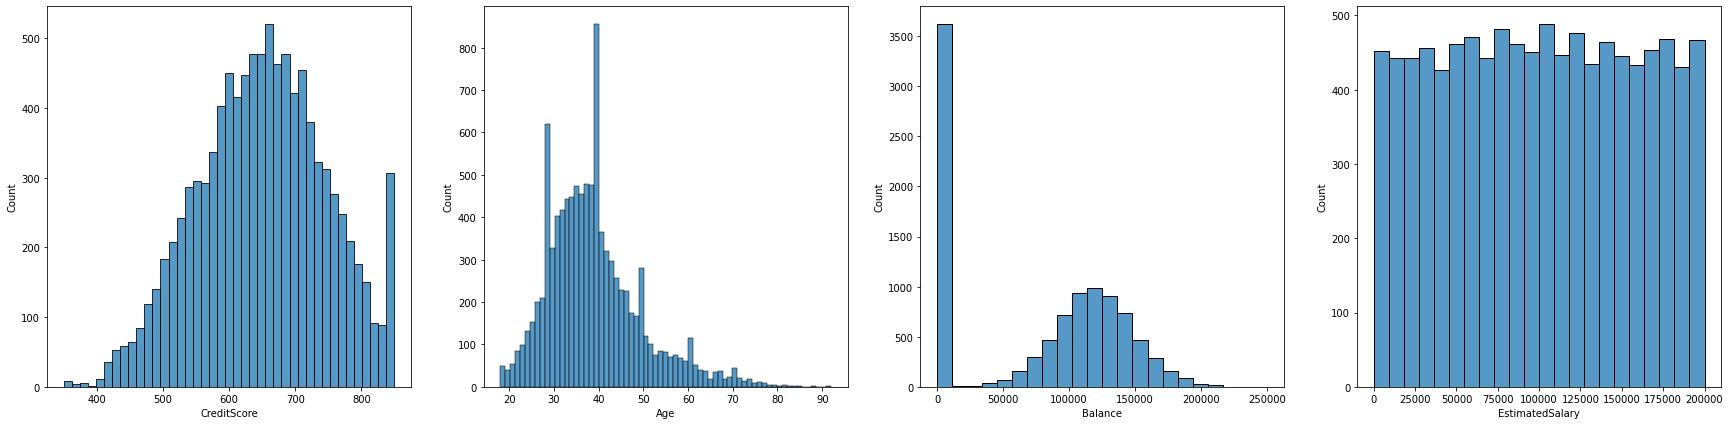

In [11]:
plt.figure(figsize = (30,7))
plt.subplot(1,4,1)
sns.histplot(df['CreditScore'])
plt.subplot(1,4,2)
sns.histplot(df['Age'])
plt.subplot(1,4,3)
sns.histplot(df['Balance'])
plt.subplot(1,4,4)
sns.histplot(df['EstimatedSalary'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

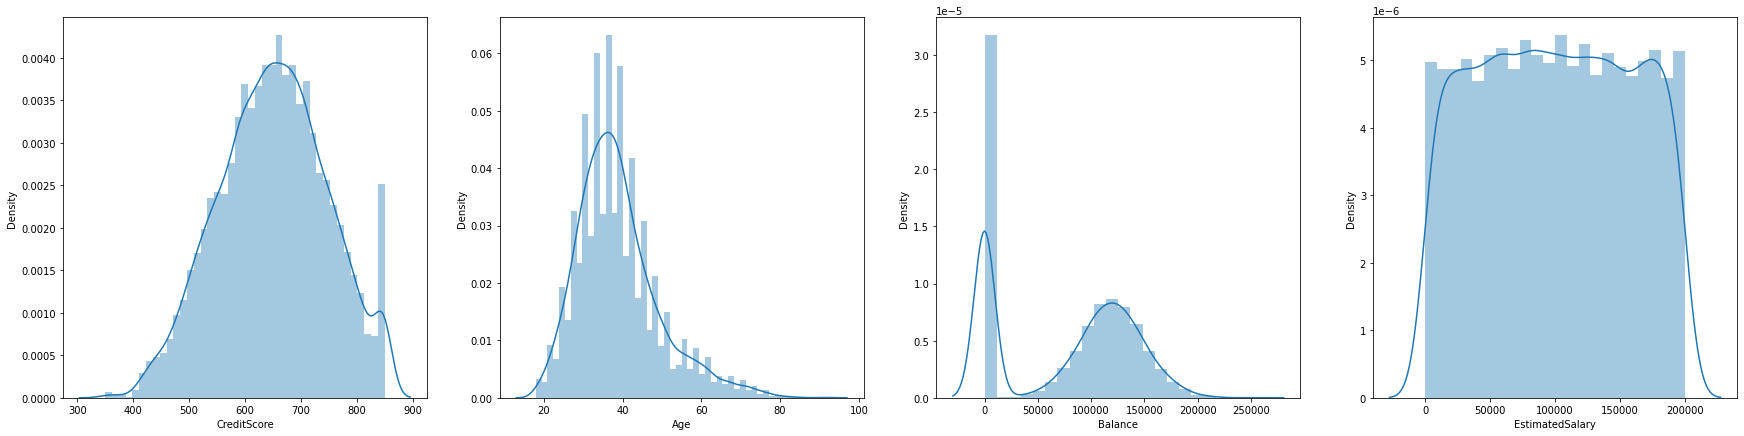

In [12]:
plt.figure(figsize = (30,7))
plt.subplot(1,4,1)
sns.distplot(df['CreditScore'])
plt.subplot(1,4,2)
sns.distplot(df['Age'])
plt.subplot(1,4,3)
sns.distplot(df['Balance'])
plt.subplot(1,4,4)
sns.distplot(df['EstimatedSalary'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

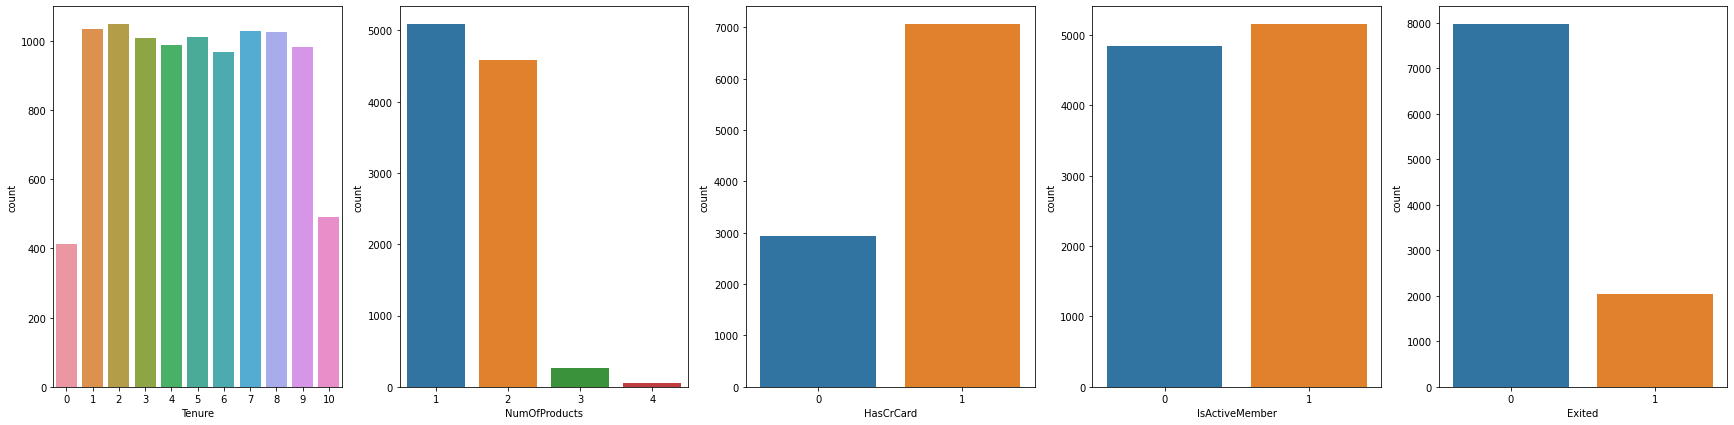

In [13]:
plt.figure(figsize = (30,7))
plt.subplot(1,5,1)
sns.countplot(df['Tenure'])
plt.subplot(1,5,2)
sns.countplot(df['NumOfProducts'])
plt.subplot(1,5,3)
sns.countplot(df['HasCrCard'])
plt.subplot(1,5,4)
sns.countplot(df['IsActiveMember'])
plt.subplot(1,5,5)
sns.countplot(df['Exited'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


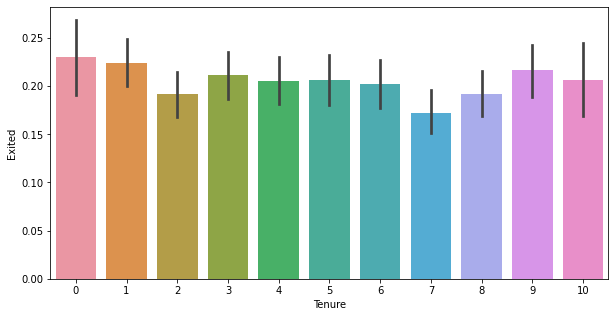

In [14]:
plt.figure(figsize = (10,5))
sns.barplot(df['Tenure'], df['Exited'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

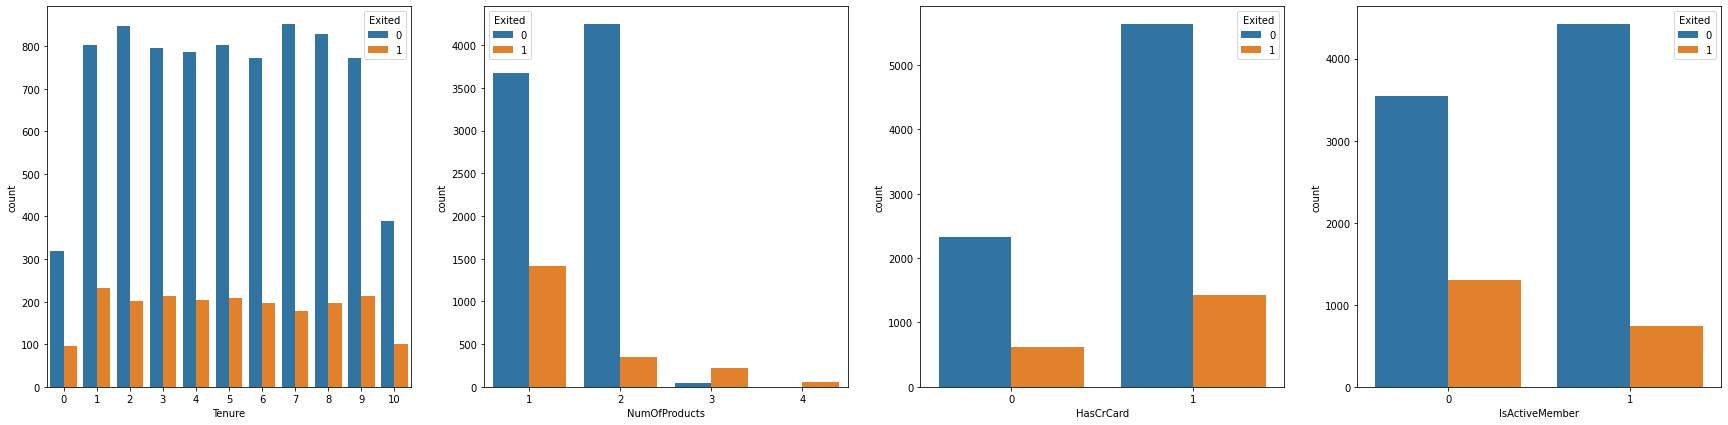

In [15]:
plt.figure(figsize = (30,7))
plt.subplot(1,4,1)
sns.countplot(df['Tenure'], hue = df['Exited'])
plt.subplot(1,4,2)
sns.countplot(df['NumOfProducts'], hue = df['Exited'])
plt.subplot(1,4,3)
sns.countplot(df['HasCrCard'], hue = df['Exited'])
plt.subplot(1,4,4)
sns.countplot(df['IsActiveMember'], hue = df['Exited'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


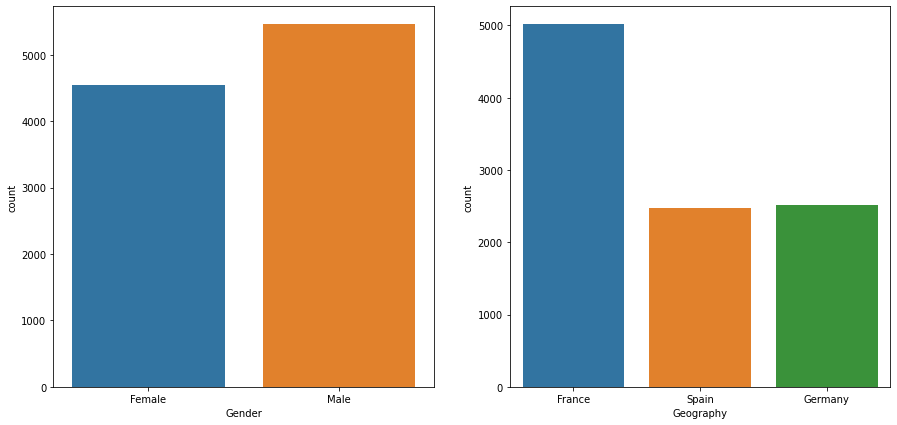

In [16]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.countplot(df['Gender'])
plt.subplot(1,2,2)
sns.countplot(df['Geography'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


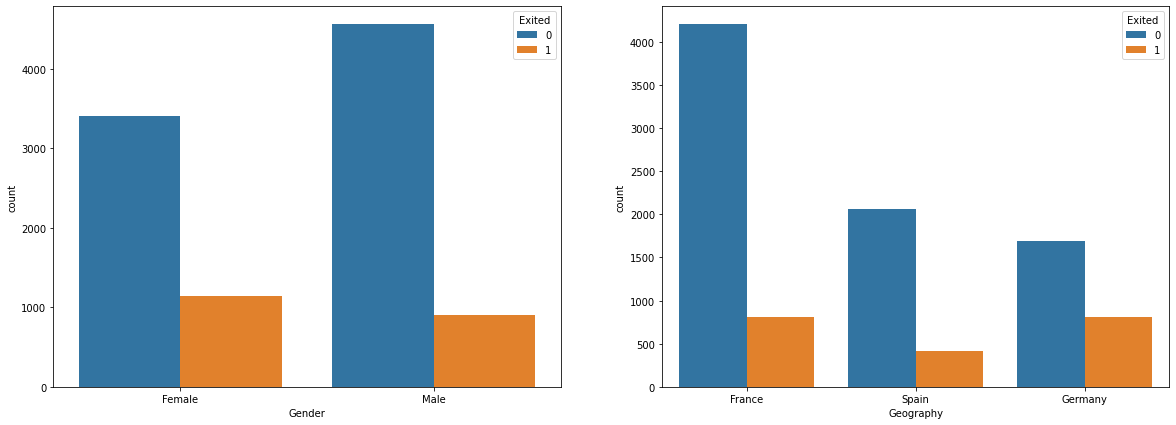

In [17]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.countplot(df['Gender'], hue=df['Exited'])
plt.subplot(1,2,2)
sns.countplot(df['Geography'], hue=df['Exited'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


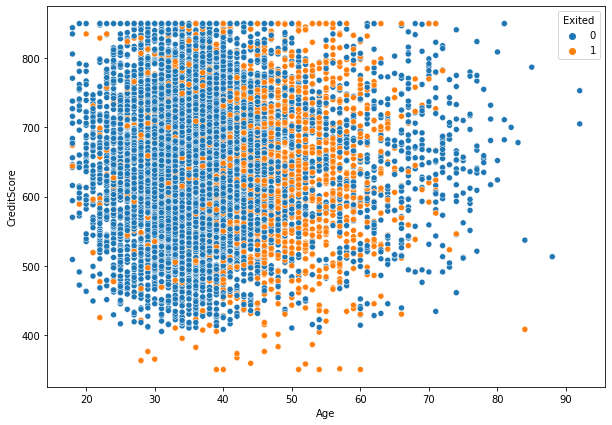

In [18]:
plt.figure(figsize = (10,7))
sns.scatterplot(df['Age'], df['CreditScore'], hue = df['Exited'])
plt.show()

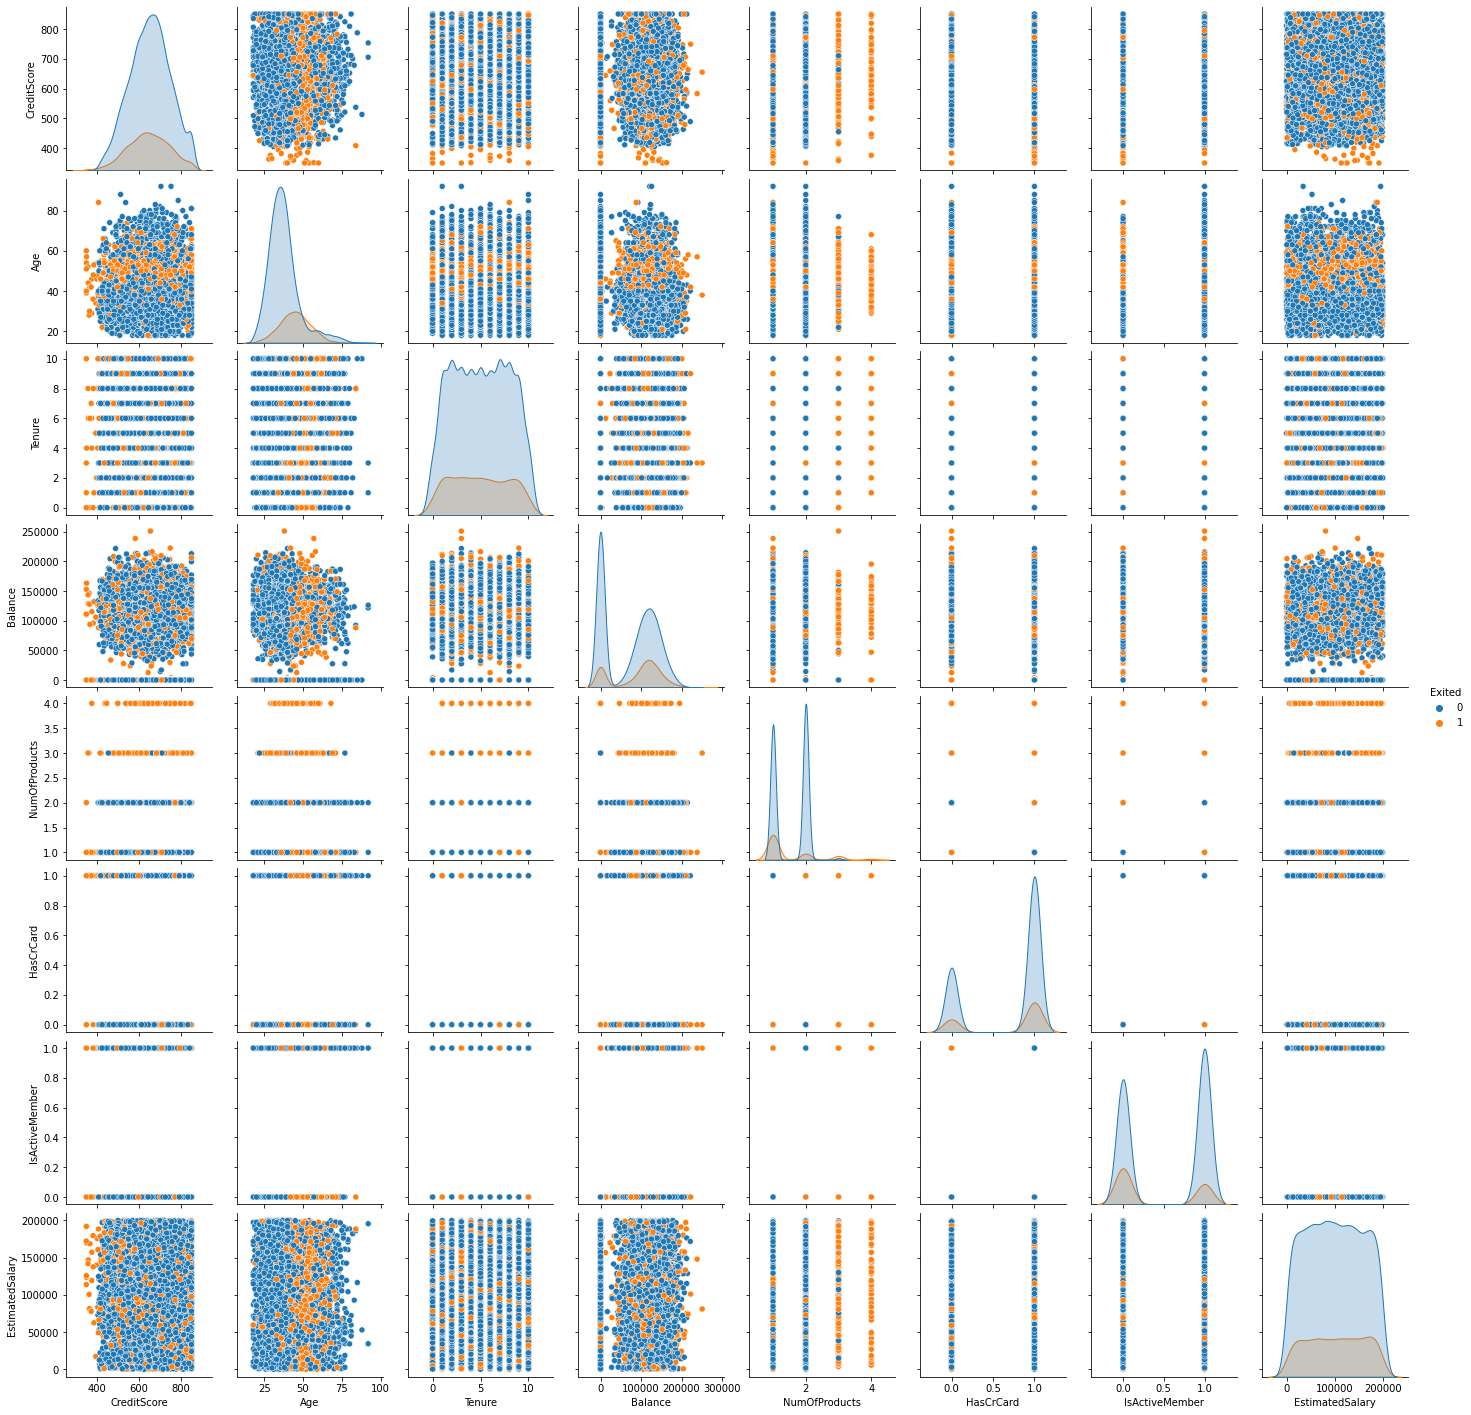

In [19]:
sns.pairplot(df, hue='Exited')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

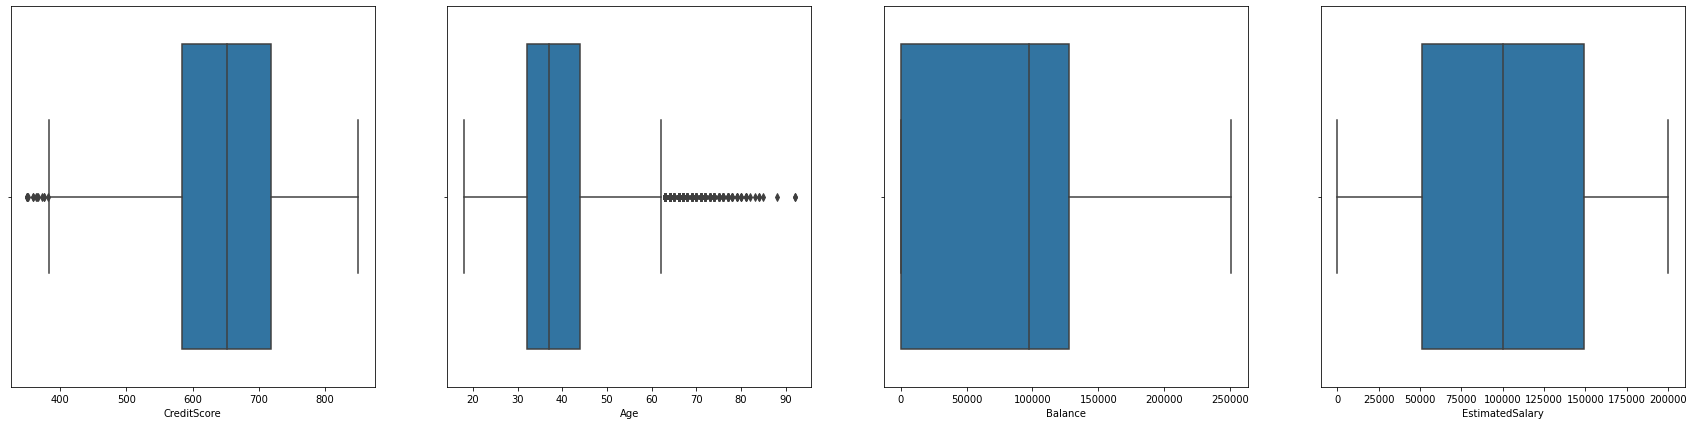

In [20]:
plt.figure(figsize = (30,7))
plt.subplot(1,4,1)
sns.boxplot(df['CreditScore'])
plt.subplot(1,4,2)
sns.boxplot(df['Age'])
plt.subplot(1,4,3)
sns.boxplot(df['Balance'])
plt.subplot(1,4,4)
sns.boxplot(df['EstimatedSalary'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

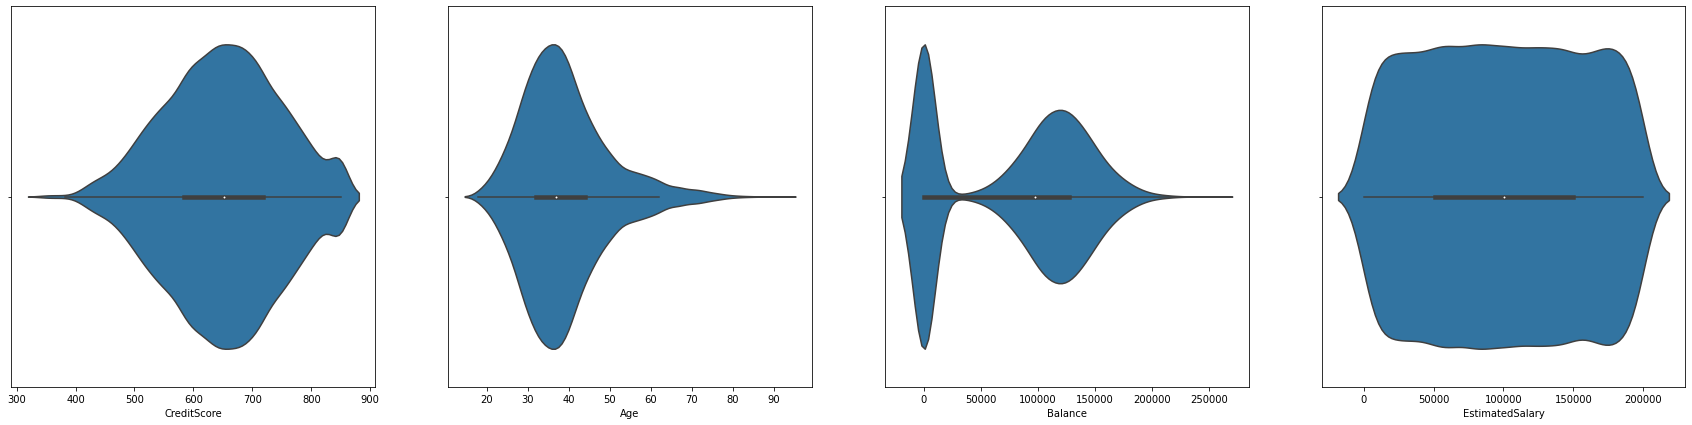

In [21]:
plt.figure(figsize = (30,7))
plt.subplot(1,4,1)
sns.violinplot(df['CreditScore'])
plt.subplot(1,4,2)
sns.violinplot(df['Age'])
plt.subplot(1,4,3)
sns.violinplot(df['Balance'])
plt.subplot(1,4,4)
sns.violinplot(df['EstimatedSalary'])
plt.show()

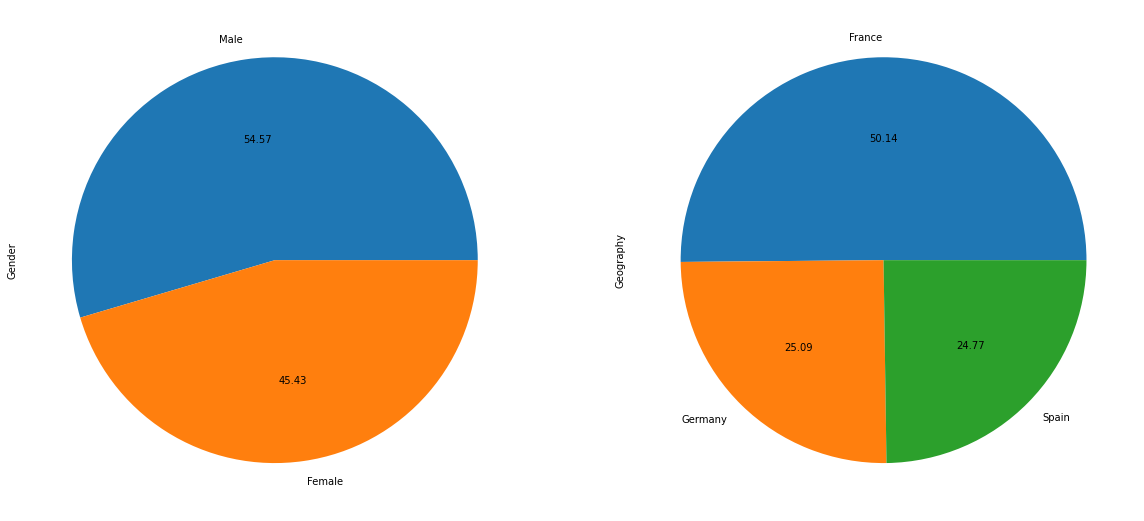

In [22]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
df['Gender'].value_counts().plot(kind = 'pie', autopct='%.2f')
plt.subplot(1,2,2)
df['Geography'].value_counts().plot(kind = 'pie', autopct='%.2f')
plt.show()

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df_gender = pd.get_dummies(df['Gender'], drop_first = True)

In [25]:
df_geography = pd.get_dummies(df['Geography'])

In [26]:
df.drop(['Gender', 'Geography'], axis = 1, inplace = True)

In [27]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df_new = pd.concat([df, df_gender, df_geography], axis=1)

In [29]:
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


In [30]:
df_new.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,France,Germany,Spain
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.002857,-0.008928,0.005538,0.004780
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.027544,-0.039208,0.046897,-0.001685
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.014733,-0.002848,-0.000567,0.003868
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.012087,-0.231329,0.401110,-0.134892
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.021859,0.001230,-0.010419,0.009039
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.005766,0.002467,0.010577,-0.013480
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.022544,0.003317,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.008112,-0.003332,0.010297,-0.006482
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.106512,-0.104955,0.173488,-0.052667
Male,-0.002857,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,1.000000,0.006772,-0.024628,0.016889


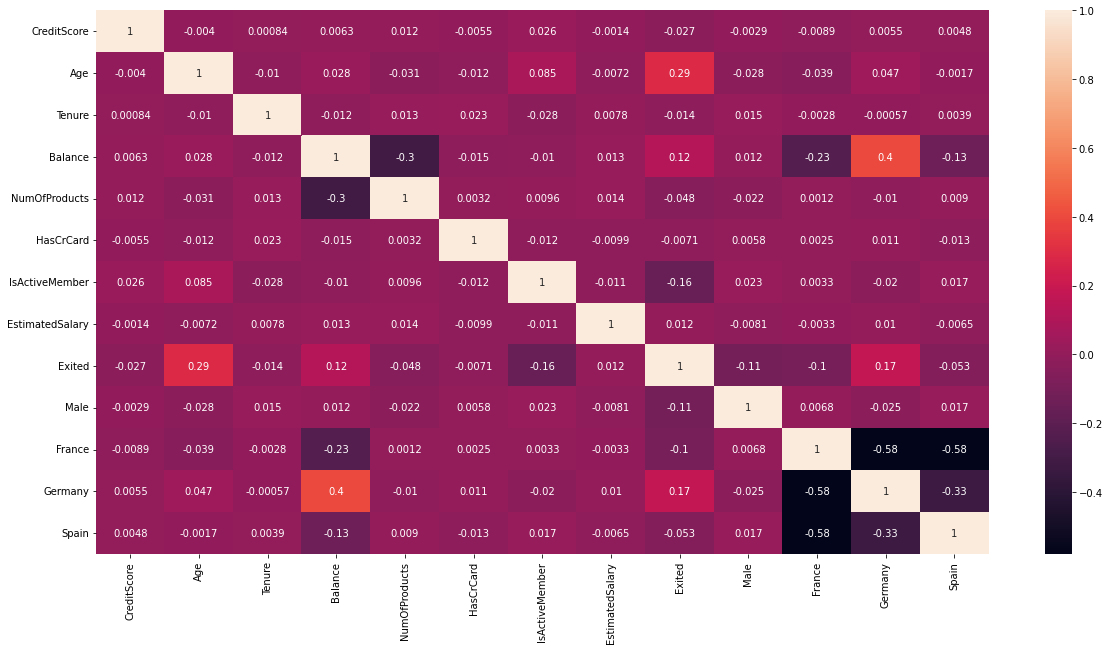

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(), annot=True)

In [32]:
X = df_new.drop('Exited', axis=1)
y = df_new['Exited']

In [33]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [34]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

order_rank = SelectKBest(score_func=chi2, k=12)
order_feature = order_rank.fit(X,y)

dfscores = pd.DataFrame(order_feature.scores_, columns = ["Score"])
dfcolumns = pd.DataFrame(X.columns)

features_rank = pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns = ['Features','Score']

In [36]:
features_rank

,Features,Score
0,CreditScore,1.054035e+02
1,Age,2.300417e+03
2,Tenure,3.270538e+00
3,Balance,7.151303e+06
4,NumOfProducts,5.055394e+00
5,HasCrCard,1.500410e-01
6,IsActiveMember,1.181994e+02
7,EstimatedSalary,4.835088e+04
8,Male,5.153993e+01
9,France,5.492371e+01


In [37]:
features_rank.nlargest(12,'Score')

,Features,Score
3,Balance,7.151303e+06
7,EstimatedSalary,4.835088e+04
1,Age,2.300417e+03
10,Germany,2.254644e+02
6,IsActiveMember,1.181994e+02
0,CreditScore,1.054035e+02
9,France,5.492371e+01
8,Male,5.153993e+01
11,Spain,2.086721e+01
4,NumOfProducts,5.055394e+00


In [38]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model=ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

[0.13530305 0.23303245 0.10633749 0.13402002 0.14426991 0.02141561
 0.03497244 0.13661424 0.01847103 0.00853583 0.02051496 0.00651298]


In [39]:
ranked_features = pd.Series(model.feature_importances_, index = X.columns)

In [40]:
ranked_features

CreditScore        0.135303
Age                0.233032
Tenure             0.106337
Balance            0.134020
NumOfProducts      0.144270
HasCrCard          0.021416
IsActiveMember     0.034972
EstimatedSalary    0.136614
Male               0.018471
France             0.008536
Germany            0.020515
Spain              0.006513
dtype: float64

In [41]:
ranked_features.nlargest(12)

Age                0.233032
NumOfProducts      0.144270
EstimatedSalary    0.136614
CreditScore        0.135303
Balance            0.134020
Tenure             0.106337
IsActiveMember     0.034972
HasCrCard          0.021416
Germany            0.020515
Male               0.018471
France             0.008536
Spain              0.006513
dtype: float64

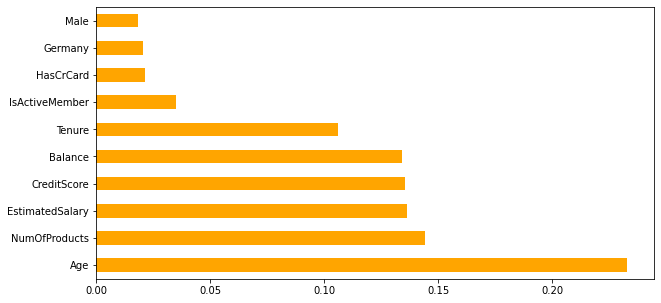

In [42]:
plt.figure(figsize = (10,5))
ranked_features.nlargest(10).plot(kind='barh', color='orange')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
y_train_scaled = sc.transform(y_train)

In [46]:
X_train_scaled

array([[-0.28222475,  1.14919188,  1.72112731, ...,  0.9990005 ,
        -0.57985213, -0.57407859],
       [-0.2101288 , -0.95483262, -1.04325013, ..., -1.0010005 ,
         1.7245776 , -0.57407859],
       [-1.00318425, -0.76355766, -1.38879731, ...,  0.9990005 ,
        -0.57985213, -0.57407859],
       ...,
       [-0.27192532,  0.19281711,  0.33893859, ...,  0.9990005 ,
        -0.57985213, -0.57407859],
       [-0.5500097 ,  0.38409206, -0.00660859, ...,  0.9990005 ,
        -0.57985213, -0.57407859],
       [-0.46761433, -0.28537028, -1.38879731, ...,  0.9990005 ,
        -0.57985213, -0.57407859]])

In [47]:
y_train_scaled

array([[-0.12773342, -0.95483262, -0.35215577, ..., -1.0010005 ,
        -0.57985213,  1.74192178],
       [ 0.06795558, -0.28537028,  1.03003295, ...,  0.9990005 ,
        -0.57985213, -0.57407859],
       [ 1.1802931 ,  0.57536702,  0.33893859, ..., -1.0010005 ,
         1.7245776 , -0.57407859],
       ...,
       [ 1.78795896, -0.28537028, -0.69770295, ...,  0.9990005 ,
        -0.57985213, -0.57407859],
       [-0.50881202, -0.95483262, -0.69770295, ...,  0.9990005 ,
        -0.57985213, -0.57407859],
       [-0.25132648, -0.38100775,  0.68448577, ..., -1.0010005 ,
        -0.57985213,  1.74192178]])

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Let's implement simple classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train_scaled, X_test)
    training_score = cross_val_score(classifier, X_train_scaled, X_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 81.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 83.0 % accuracy score
Classifiers:  SVC Has a training score of 86.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 79.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 86.0 % accuracy score


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, refit=True, verbose=4)
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, refit=True)
grid_log_reg.fit(X_train_scaled, X_test)
print(grid_log_reg.best_params_)
print(grid_log_reg.best_estimator_)

{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01)


accuracy: 0.8135
classification report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      1588
           1       0.67      0.18      0.29       412

    accuracy                           0.81      2000
   macro avg       0.75      0.58      0.59      2000
weighted avg       0.79      0.81      0.77      2000



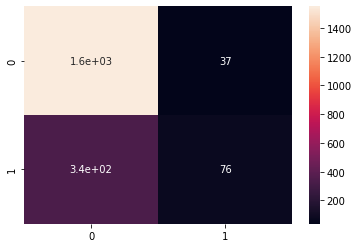

In [51]:
grid_log_reg_predictions = grid_log_reg.predict(y_train_scaled)
cm = confusion_matrix(y_test, grid_log_reg_predictions)
accuracy = accuracy_score(y_test, grid_log_reg_predictions)
class_report = classification_report(y_test, grid_log_reg_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [52]:
# svc_param = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']} 
svc_param = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']} 
# grid_svc = GridSearchCV(SVC(), svc_param, refit=True, verbose=4)
grid_svc = GridSearchCV(SVC(), svc_param, refit=True)
grid_svc.fit(X_train_scaled, X_test)
print(grid_svc.best_params_)
print(grid_svc.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


accuracy: 0.853
classification report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1588
           1       0.78      0.40      0.53       412

    accuracy                           0.85      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.85      0.83      2000



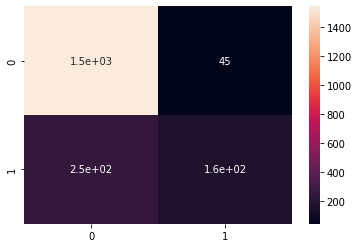

In [53]:
grid_svc_predictions = grid_svc.predict(y_train_scaled)
cm = confusion_matrix(y_test, grid_svc_predictions)
accuracy = accuracy_score(y_test, grid_svc_predictions)
class_report = classification_report(y_test, grid_svc_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [54]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
# grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, refit=True, verbose=4)
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, refit=True)
grid_knears.fit(X_train_scaled, X_test)
print(grid_knears.best_params_)
print(grid_knears.best_estimator_)

{'algorithm': 'auto', 'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4)


accuracy: 0.831
classification report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1588
           1       0.72      0.29      0.42       412

    accuracy                           0.83      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.83      0.80      2000



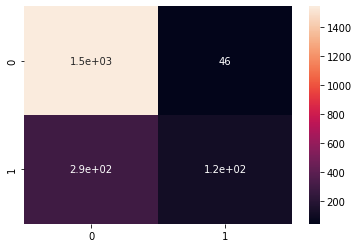

In [55]:
grid_kn_predictions = grid_knears.predict(y_train_scaled)
cm = confusion_matrix(y_test, grid_kn_predictions)
accuracy = accuracy_score(y_test, grid_kn_predictions)
class_report = classification_report(y_test, grid_kn_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [56]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
# grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, refit=True, verbose=4)
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, refit=True)
grid_tree.fit(X_train_scaled, X_test)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)


accuracy: 0.838
classification report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1588
           1       0.83      0.27      0.40       412

    accuracy                           0.84      2000
   macro avg       0.84      0.63      0.66      2000
weighted avg       0.84      0.84      0.80      2000



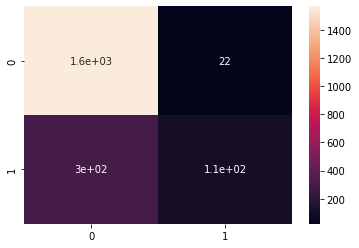

In [57]:
grid_dt_predictions = grid_tree.predict(y_train_scaled)
cm = confusion_matrix(y_test, grid_dt_predictions)
accuracy = accuracy_score(y_test, grid_dt_predictions)
class_report = classification_report(y_test, grid_dt_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [58]:
# randomforest_params = {'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
randomforest_params = {'bootstrap': [True, False], 'max_depth': [10, 20], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [200, 400]}
# grid_rf = GridSearchCV(RandomForestClassifier(), randomforest_params, refit=True, verbose=4)
grid_rf = GridSearchCV(RandomForestClassifier(), randomforest_params, refit=True)
grid_rf.fit(X_train_scaled, X_test)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=200)


accuracy: 0.863
classification report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1588
           1       0.79      0.46      0.58       412

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



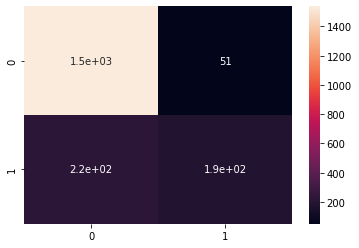

In [59]:
grid_rf_predictions = grid_rf.predict(y_train_scaled)
cm = confusion_matrix(y_test, grid_rf_predictions)
accuracy = accuracy_score(y_test, grid_rf_predictions)
class_report = classification_report(y_test, grid_rf_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [73]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [77]:
classifier = Sequential()
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dense(units=8,activation='relu'))
classifier.add(Dense(units=4,activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [78]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [79]:
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
callbacks = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model_history = classifier.fit(X_train_scaled, X_test, validation_split=0.3, batch_size=5, epochs=100, callbacks=[callbacks, model_checkpoint] )

Epoch 1/100
1097/1120 [============================>.] - ETA: 0s - loss: 0.5708 - accuracy: 0.7562
Epoch 1: val_accuracy improved from -inf to 0.80458, saving model to best_model.h5
1120/1120 [==============================] - 3s 2ms/step - loss: 0.5682 - accuracy: 0.7575 - val_loss: 0.4437 - val_accuracy: 0.8046
Epoch 2/100
1100/1120 [============================>.] - ETA: 0s - loss: 0.4166 - accuracy: 0.8191
Epoch 2: val_accuracy improved from 0.80458 to 0.82292, saving model to best_model.h5
1120/1120 [==============================] - 2s 2ms/step - loss: 0.4152 - accuracy: 0.8204 - val_loss: 0.4021 - val_accuracy: 0.8229
Epoch 3/100
1090/1120 [============================>.] - ETA: 0s - loss: 0.3861 - accuracy: 0.8396
Epoch 3: val_accuracy improved from 0.82292 to 0.83833, saving model to best_model.h5
1120/1120 [==============================] - 2s 2ms/step - loss: 0.3861 - accuracy: 0.8398 - val_loss: 0.3822 - val_accuracy: 0.8383
Epoch 4/100
1089/1120 [==========================

In [82]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


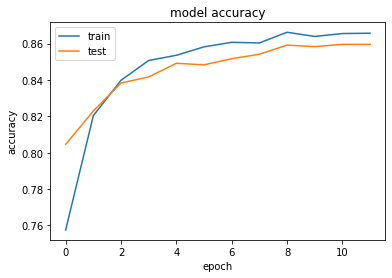

In [83]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

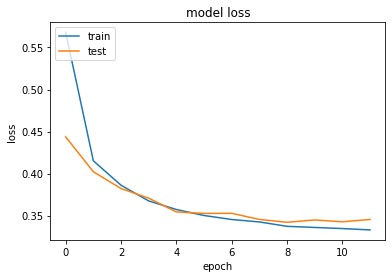

In [84]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy: 0.852
classification report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1588
           1       0.73      0.45      0.56       412

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



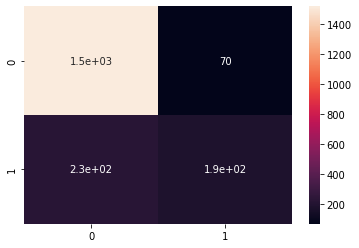

In [85]:
saved_model = load_model('best_model.h5')
ann_predictions_score = saved_model.predict(y_train_scaled)
ann_predictions = (ann_predictions_score > 0.5)
cm = confusion_matrix(y_test, ann_predictions)
accuracy = accuracy_score(y_test, ann_predictions)
class_report = classification_report(y_test, ann_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)